# Probabilistic programming and Bayesian Interferance for Hackers

## Chapter 1
Probability P(A) it is our belief that A will happen. This is prior prabability  
Probability P(A|X) is a belief that A will happen now that we know that X happend. This is posterior probability

\begin{align}
 P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
& \propto P(X | A) P(A)\;\; (\propto \text{is proportional to })
\end{align}

After we see N exampples we can calculate the observed probability, but as N -> inf we get closer to the true probability.

**Expenceted value** is the true mean of the random variable (so the mean value we will get with N -> inf examples of this variable).
It is not the value that is most likely to be seen. 
E.g. the expected value of flipping th ecoin is 0.5, althought we will never see this result. 

### Discrete
Categorical, binary or integer variable, e.g. population, yes/no, ratings  
Distribution is described with a **probability mass function**

**Poison distribution**  
Parameter: $\lambda$ (positive, real)  
Output: discrete, only nonnegative integers have positive probablibity  
Expencted value : $\lambda$  
$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$$Z \sim \text{Poi}(\lambda) $$

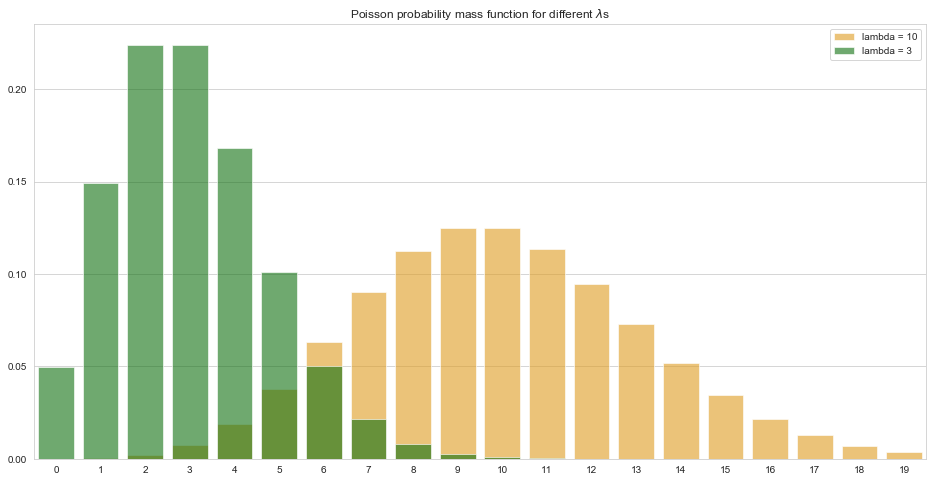

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

plt.figure(figsize = (16,8))
sns.set_style('whitegrid')

Z = np.arange(20)
poisson = stats.poisson
big_lambda = 10
small_lambda = 3

sns.barplot(Z, poisson.pmf(Z, big_lambda), label='lambda = {}'.format(big_lambda), alpha=0.6, color='orange')
sns.barplot(Z, poisson.pmf(Z, small_lambda), label='lambda = {}'.format(small_lambda), alpha=0.6, color = 'green')
plt.title('Poisson probability mass function for different $\lambda$s')

plt.legend()

### Continues
Real, continues values e.g. temperature, price
The distribution is described by **probability desity function**

**Exponential distribution**  
Parameter: $\lambda$ - positive real  
Output: continues, nonnegative real numbers  
Expected value: $\frac{1}{\lambda}$  
    
$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

$$Z \sim \text{Exp}(\lambda)$$

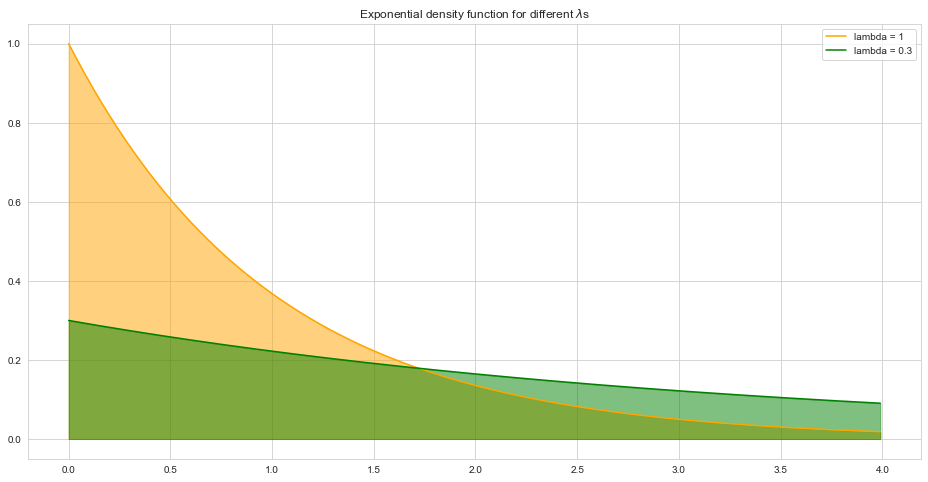

In [78]:
plt.figure(figsize=(16,8))
Z = np.arange(0, 4, 0.01)
exp = stats.expon
big_lambda = 1
small_lambda = 0.3

sns.lineplot(Z, exp.pdf(Z, scale=1./big_lambda), label='lambda = {}'.format(big_lambda), color='orange')
plt.fill_between(Z, 0, exp.pdf(Z, scale=1./big_lambda), color='orange', alpha = 0.5)
sns.lineplot(Z, exp.pdf(Z, scale=1./small_lambda), label='lambda = {}'.format(small_lambda), color='green')
plt.fill_between(Z, 0, exp.pdf(Z, scale=1./small_lambda), color='green', alpha = 0.5)
plt.title('Exponential density function for different $\lambda$s')

plt.legend()

## How do we get $\lambda$?

$\lambda$ is fixed, but its true value is unknown to us (otherwise we will a;ready perfectly known the process we are analising). However we can estimate $\lambda$ by describing its value with our belief about it. So e.g. we say that our belief about $\lambda$ follows a exponential distribution (the output rnage is the same as $\lambda$ range):

$$\lambda \sim \text{Exp}(\alpha)$$

But then we end up with a new unknown $\alpha$ - this is called a *hyperparameter*.  
As we don't have any belief about the $\alpha$ we can use the information about the expected value and use an oserved expected value to assign a value to $\alpha$.

Having described $\lambda$ as a stochastic (random, not deterministic) variable and having some number N of observations, we can update the $\alpha$ value with a Marcov Chain Monte Carlo Simulation 

## Chapter 2